# Analise - Titanic

Realizando analises com a base de dados do titanic.

In [5]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Importanto DF
df = pd.read_csv('titanic.csv')

In [12]:
# Primeiras linhas
df.head( 3 )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S


In [14]:
# Ultimas linhas
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
# Tamanho
df.shape

(1309, 12)

In [18]:
# Informações básicas
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,4428.40
std,378.02,0.48,0.84,14.41,1.04,0.87,25417.09
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,8.05
50%,655.00,0.00,3.00,28.00,0.00,0.00,20.09
75%,982.00,1.00,3.00,39.00,1.00,0.00,57.98
max,1309.00,1.00,3.00,80.00,8.00,9.00,262375.00


In [30]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [36]:
# Filtrar passageiros por idade

criancas = df.loc[ df['Age'] < 18 ]

7       NaN
9       NaN
10       G6
14      NaN
16      NaN
       ... 
1270    NaN
1280    NaN
1283    NaN
1294    NaN
1300    NaN
Name: Cabin, Length: 154, dtype: object

In [40]:
# Passageiros da primeira classe
primeira_classe = df.loc[ df['Pclass'] == 1 ]
primeira_classe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 1 to 1305
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  323 non-null    int64  
 1   Survived     323 non-null    int64  
 2   Pclass       323 non-null    int64  
 3   Name         323 non-null    object 
 4   Sex          323 non-null    object 
 5   Age          284 non-null    float64
 6   SibSp        323 non-null    int64  
 7   Parch        323 non-null    int64  
 8   Ticket       323 non-null    object 
 9   Fare         323 non-null    float64
 10  Cabin        256 non-null    object 
 11  Embarked     321 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 32.8+ KB


In [48]:
primeira_classe.loc[ primeira_classe['Age'] < 18 ].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 297 to 1294
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  15 non-null     int64  
 1   Survived     15 non-null     int64  
 2   Pclass       15 non-null     int64  
 3   Name         15 non-null     object 
 4   Sex          15 non-null     object 
 5   Age          15 non-null     float64
 6   SibSp        15 non-null     int64  
 7   Parch        15 non-null     int64  
 8   Ticket       15 non-null     object 
 9   Fare         15 non-null     float64
 10  Cabin        14 non-null     object 
 11  Embarked     15 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ KB


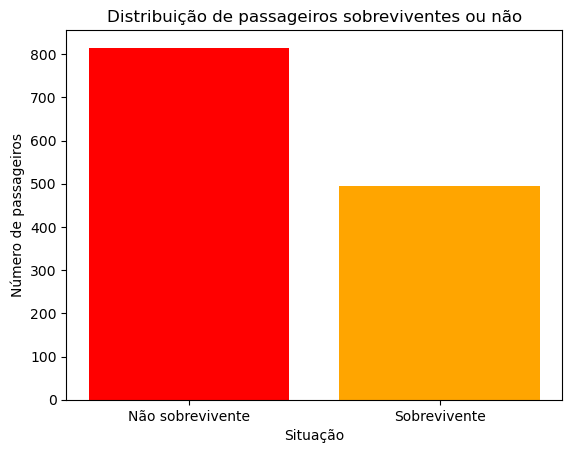

In [78]:
# Passageiros vivos x mortos

# Contagem de passageiros por classe
passageiros_status = df['Survived'].value_counts().sort_index()

labels = {0: 'Não sobrevivente', 1: 'Sobrevivente'}

# Gráfico de barras
plt.bar([labels[i] for i in passageiros_status.index], passageiros_status.values, color=['red', 'orange'])
plt.xlabel("Situação")
plt.ylabel("Número de passageiros")
plt.title("Distribuição de passageiros sobreviventes ou não")
plt.show()

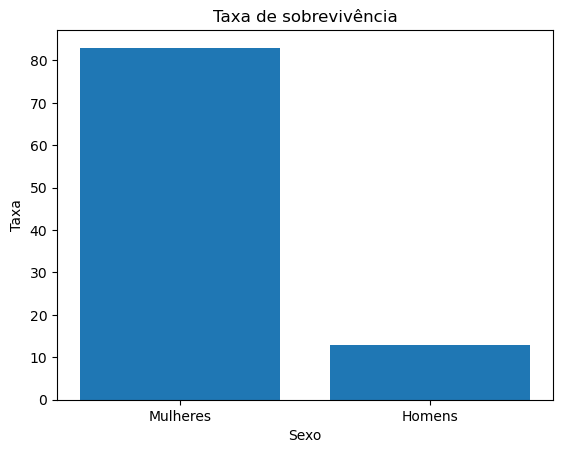

In [88]:
# Calcular taxa de sobreviventes por sexo

taxa_sobrevivencia_sexo = df.groupby('Sex')['Survived'].mean().round(2) * 100

labels = {'male': 'Homens', 'female': 'Mulheres'}

# Gráfico de barras
plt.bar([labels[i] for i in taxa_sobrevivencia_sexo.index], taxa_sobrevivencia_sexo.values)
plt.xlabel("Sexo")
plt.ylabel("Taxa")
plt.title("Taxa de sobrevivência")
plt.show()

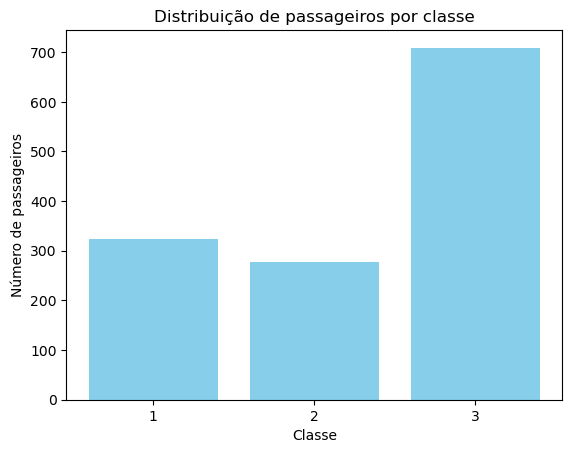

In [44]:
# Passageiros por classe

# Contagem de passageiros por classe
passageiros_por_classe = df['Pclass'].value_counts().sort_index()

# Gráfico de barras
plt.bar(passageiros_por_classe.index.astype(str), passageiros_por_classe.values, color='skyblue')
plt.xlabel("Classe")
plt.ylabel("Número de passageiros")
plt.title("Distribuição de passageiros por classe")
plt.show()

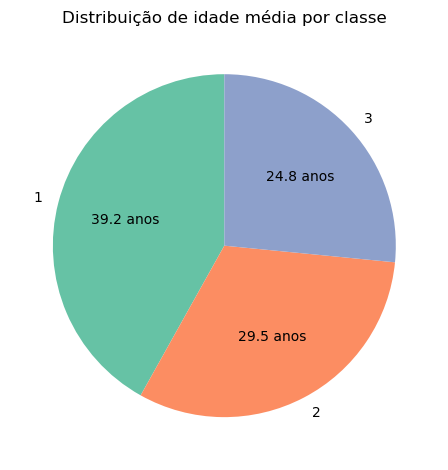

In [66]:
# Idade por classe
media_idade_por_classe = df.groupby('Pclass')['Age'].mean().round(2)

def mostrar_idade(pct, valores):
    idade = round(pct / 100. * sum(valores), 1)
    return f"{idade} anos"

plt.pie(
    media_idade_por_classe.values,
    labels=media_idade_por_classe.index.astype(str),
    autopct=lambda pct: mostrar_idade(pct, media_idade_por_classe.values),
    startangle=90,
    colors=['#66c2a5', '#fc8d62', '#8da0cb']
)

plt.title("Distribuição de idade média por classe")
plt.tight_layout()
plt.show()


In [92]:
# Média da idade dos sobreviventes

media_idade_sobreviventes = df[df['Survived'] == 1]['Age'].mean().round(2)
media_idade_sobreviventes

28.93

In [114]:
# Quem pagou a taxa mais cara?
passageiro_mais_caro = df.loc[ df['Fare'] == df['Fare'].max()]
passageiro_mais_caro

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262375.0,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262375.0,B57 B59 B63 B66,C
915,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262375.0,B57 B59 B63 B66,C
950,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262375.0,B61,C
955,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262375.0,B57 B59 B63 B66,C
1033,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262375.0,B57 B59 B63 B66,C
1266,1267,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262375.0,NaN,C


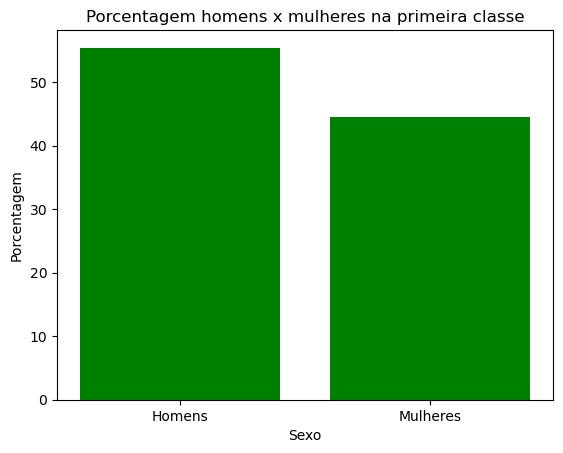

In [104]:
# Porcentagem homens x mulheres na primeira classe

contagem_sexo = primeira_classe['Sex'].value_counts()

porcentagem_sexo = (contagem_sexo / contagem_sexo.sum() * 100).round(2)

labels = {'male': 'Homens', 'female': 'Mulheres'}

# Gráfico de barras
plt.bar([labels[i] for i in porcentagem_sexo.index], porcentagem_sexo.values, color='green')
plt.xlabel("Sexo")
plt.ylabel("Porcentagem")
plt.title("Porcentagem homens x mulheres na primeira classe")
plt.show()

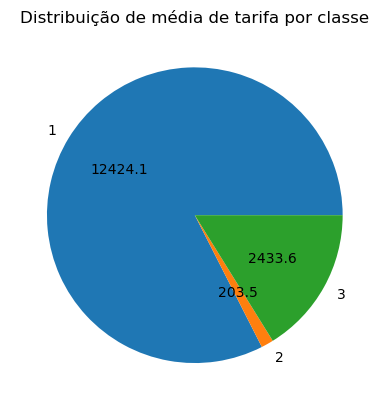

In [122]:
# Média de tarifas por classe
media_tarifas_por_classe = df.groupby('Pclass')['Fare'].mean().round(2)

def mostrar_tarifa(pct, valores):
    tarifa = round(pct / 100. * sum(valores), 1)
    return tarifa

plt.pie(
    media_tarifas_por_classe.values,
    labels=media_tarifas_por_classe.index.astype(str),
    autopct=lambda pct: mostrar_tarifa(pct, media_tarifas_por_classe.values)
)

plt.title("Distribuição de média de tarifa por classe")
plt.show()

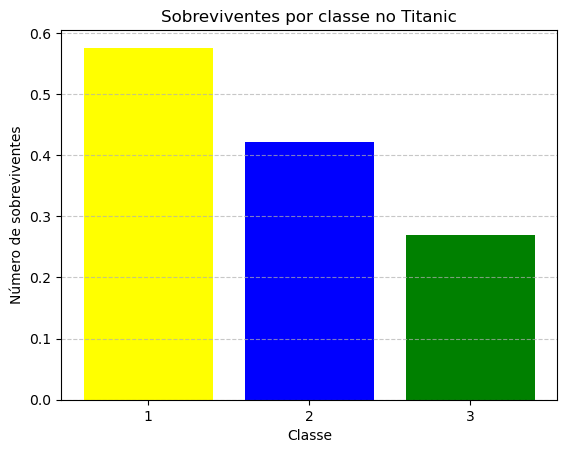

In [136]:
# Sobreviventes por classe

sobreviventes_por_classe = df.groupby('Pclass')['Survived'].mean()

# Gráfico de barras
plt.bar(sobreviventes_por_classe.index.astype(str), sobreviventes_por_classe.values, color=['yellow', 'blue', 'green'])
plt.xlabel("Classe")
plt.ylabel("Número de sobreviventes")
plt.title("Sobreviventes por classe no Titanic")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

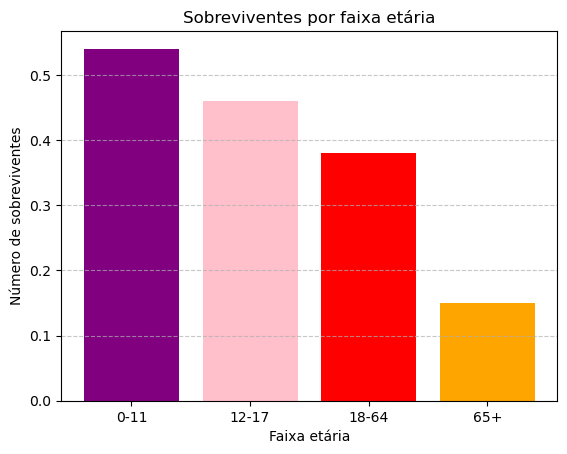

In [150]:
# Faixas etárias 
faixas = [0, 12, 18, 65, 100]
labels = ['0-11', '12-17', '18-64', '65+']

df['FaixaEtaria'] = pd.cut(df['Age'], bins=faixas, labels=labels, right=False)

taxa_sobrevivencia = df.groupby('FaixaEtaria', observed=False)['Survived'].mean().round(2)

plt.bar(taxa_sobrevivencia.index.astype(str), taxa_sobrevivencia.values, color=['purple', 'pink', 'red', 'orange'])
plt.xlabel("Faixa etária")
plt.ylabel("Número de sobreviventes")
plt.title("Sobreviventes por faixa etária")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

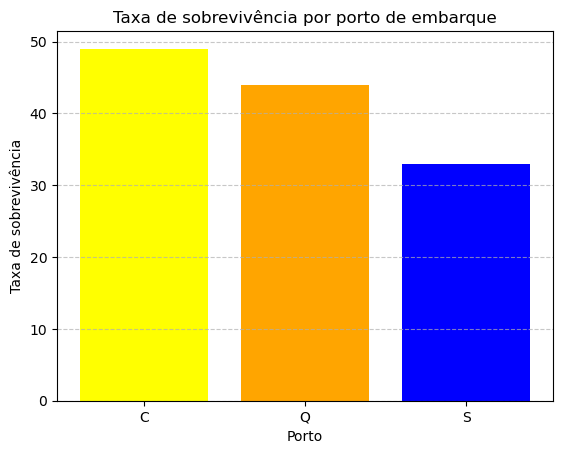

In [160]:
# Taxa de sobrevivência por porto de embarque
taxa_por_embarque = df.groupby('Embarked', observed=True)['Survived'].mean().round(2) * 100

plt.bar(taxa_por_embarque.index.astype(str), taxa_por_embarque.values, color=['yellow', 'orange', 'blue'])
plt.xlabel("Porto")
plt.ylabel("Taxa de sobrevivência")
plt.title("Taxa de sobrevivência por porto de embarque")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

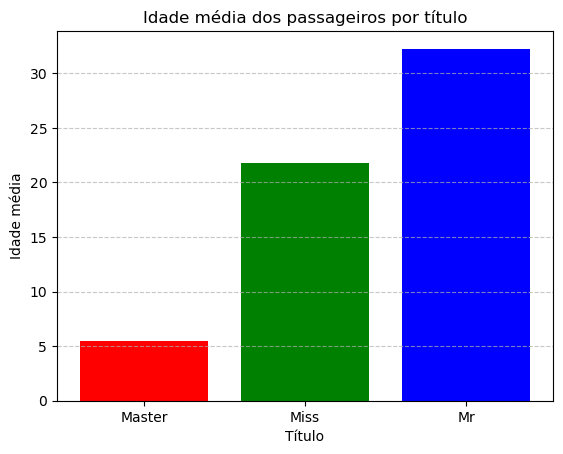

In [162]:
# Idade média dos passageiros por título

df['Title'] = df['Name'].str.extract(r',\s*(\w+)\.')

titulos_desejados = ['Mr', 'Miss', 'Master', 'Mrs']
df_filtrado = df[df['Title'].isin(titulos_desejados)]

media_idade_por_titulo = df_filtrado.groupby('Title', observed=True)['Age'].mean().round(2)
plt.bar(media_idade_por_titulo.index.astype(str), media_idade_por_titulo.values, color=['red', 'green', 'blue'])
plt.xlabel("Título")
plt.ylabel("Idade média")
plt.title("Idade média dos passageiros por título")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

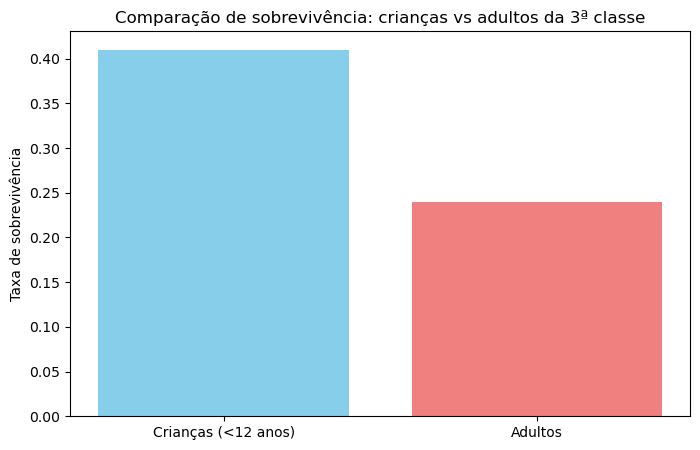

In [174]:
# Taxa de sobrevivência entre crianças e adultos da terceira classe

criancas_3classe = df[(df['Age'] < 12) & (df['Pclass'] == 3)]
taxa_criancas = criancas_3classe['Survived'].mean().round(2)

adultos_terceira = df[(df['Pclass'] == 3) & (df['Age'] >= 18)]
taxa_adultos_terceira = adultos_terceira['Survived'].mean().round(2)

plt.figure(figsize=(8, 5))
plt.bar(['Crianças (<12 anos)', 'Adultos'], [taxa_criancas, taxa_adultos_terceira], color=['skyblue', 'lightcoral'])
plt.ylabel("Taxa de sobrevivência")
plt.title("Comparação de sobrevivência: crianças vs adultos da 3ª classe")
plt.show()

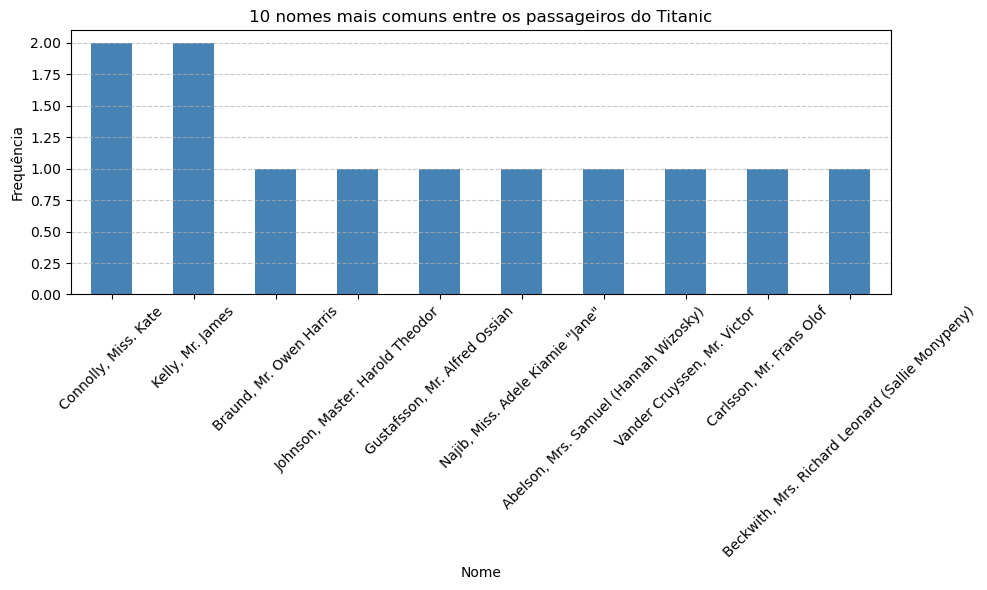

In [178]:
# Nomes mais comuns (Top 10)

nomes_mais_comuns = df['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
nomes_mais_comuns.plot(kind='bar', color='steelblue')
plt.xlabel("Nome")
plt.ylabel("Frequência")
plt.title("10 nomes mais comuns entre os passageiros do Titanic")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
